# Rice Classification with CNN
https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/

### What to Expect?
In this notebook I'm gonna be using  (No Recurrent Layers, no Transfer Learning , no Generative Models) using keras/tensorflow (at least 5 Convolutional Layers, and at least 3 Pooling Layers) to do a classification model for our dataset.

### Dataset Overview
This dataset includes 5 different rice types images with 15000 images for every category. And our task is to make a classification model that could correctly predict the 5 kinds of rice.

#### Rice Types
* Arborio
* Basmati
* Ipsala
* Jasmine
* Karacadag

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## 1. Veri Yolu ve Görüntü Boyutlarını Tanımlama


In [2]:
train_dir = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset' # Verisetinin yolu
img_width, img_height = 100, 100  # Görüntü boyutu (genişlik, yükseklik)

## 2. Veri Artırma ve Ön İşleme

In [3]:
# Eğitim ve doğrulama verilerini hazırlama (veri artırma ve doğrulama bölme)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Görüntüleri 0-1 aralığına ölçekleme
    rotation_range=20,  # Rastgele döndürme
    width_shift_range=0.2,  # Rastgele yatay kaydırma
    height_shift_range=0.2,  # Rastgele dikey kaydırma
    shear_range=0.2,  # Rastgele kaydırma
    zoom_range=0.2,  # Rastgele yakınlaştırma
    horizontal_flip=True,  # Rastgele yatay döndürme
    fill_mode='nearest',  # Boşlukları en yakın pikselle doldurma
    validation_split=0.2  # Veri kümesinin %20'sini doğrulama için ayırma
)

test_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # Doğrulama bölmesini ayarlama


## 3. Eğitim ve Test Verilerini Yükleme

In [4]:
# Eğitim veri setini yükleme
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),  # Görüntüleri yeniden boyutlandırma
    batch_size=64,  # Batch boyutu
    class_mode='categorical',  # Çoklu sınıf sınıflandırma
    subset='training'  # Eğitim alt kümesini kullanma
)

# Doğrulama veri setini yükleme
validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),  # Görüntüleri yeniden boyutlandırma
    batch_size=64,  # Batch boyutu
    class_mode='categorical',  # Çoklu sınıf sınıflandırma
    subset='validation'  # Doğrulama alt kümesini kullanma
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


## 4. CNN Modelini Tanımlama

In [5]:
# CNN modelini tanımlama
model = Sequential()

# İlk konvolüsyon ve havuzlama katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))  # İlk konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))  # İlk havuzlama katmanı

# İkinci konvolüsyon ve havuzlama katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))  # İkinci konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))  # İkinci havuzlama katmanı

# Üçüncü konvolüsyon ve havuzlama katmanı
model.add(Conv2D(128, (3, 3), activation='relu'))  # Üçüncü konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))  # Üçüncü havuzlama katmanı

# Dördüncü konvolüsyon ve havuzlama katmanı
model.add(Conv2D(256, (3, 3), activation='relu'))  # Dördüncü konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))  # Dördüncü havuzlama katmanı

# Beşinci konvolüsyon katmanı
model.add(Conv2D(512, (3, 3), activation='relu'))  # Beşinci konvolüsyon katmanı

# Çıktıyı düzleştirme ve tam bağlı katmanlar ekleme
model.add(Flatten())  # Çıktıyı düzleştirme
model.add(Dense(512, activation='relu'))  # Tam bağlı katman
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Son sınıflandırma katmanı


## 5. Modeli Derleme

In [6]:
# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.1),  # Adam optimizasyonu
              loss='categorical_crossentropy',  # Kategorik çapraz entropi kaybı
              metrics=['accuracy'])  # Doğruluk metriği

## 6. Modeli Eğitme

In [7]:
# Modeli eğitme (epoch sayısını 10'a düşürme)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Her epoch'taki adım sayısı
    epochs=10,  # Eğitim dönemi sayısını 10'a düşürme
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size  # Her epoch'taki doğrulama adım sayısı
)

Epoch 1/10
 31/937 [..............................] - ETA: 7:04 - loss: 1503290.6250 - accuracy: 0.2006

KeyboardInterrupt: 

## 7. Modeli Kaydetme

In [ ]:
# Modeli kaydetme
model.save('rice_classifier_model.h5')

## 8. Eğitim Sürecinin Grafiklerini Çizme

In [8]:
# Eğitim sürecinin grafiklerini çizme
plt.plot(history.history['accuracy'], label='Doğruluk')  # Eğitim doğruluğu
plt.plot(history.history['val_accuracy'], label='Doğruluk (Doğrulama)')  # Doğrulama doğruluğu
plt.xlabel('Epoch')  # X ekseni etiketi
plt.ylabel('Doğruluk')  # Y ekseni etiketi
plt.ylim([0, 1])  # Y ekseninin sınırları
plt.legend(loc='lower right')  # Efsane konumu
plt.show()  # Grafiği göster

NameError: name 'history' is not defined

# Bonus: Training model takes too much time, split the data and train with 10 epochs

In [11]:
import os
import shutil
import numpy as np

# Eğitim ve doğrulama veri alt kümeleri oluşturma
def create_subset(directory, subset_dir, fraction=0.1):
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)
    
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            subset_class_dir = os.path.join(subset_dir, class_name)
            if not os.path.exists(subset_class_dir):
                os.makedirs(subset_class_dir)
            files = os.listdir(class_dir)
            subset_files = np.random.choice(files, size=int(len(files) * fraction), replace=False)
            for file_name in subset_files:
                shutil.copy(os.path.join(class_dir, file_name), subset_class_dir)

# Eğitim ve doğrulama alt kümeleri oluşturma
train_dir_subset = '/kaggle/working/Rice_Image_Dataset_subset/train'
validation_dir_subset = '/kaggle/working/Rice_Image_Dataset_subset/validation'

# Eğitim ve doğrulama alt kümeleri oluşturulacak
create_subset(train_dir, train_dir_subset, fraction=0.1)
create_subset(train_dir, validation_dir_subset, fraction=0.1)


In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir_subset,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir_subset,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical'
)

Found 7500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


In [13]:
# Modeli eğitme
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Her epoch'taki adım sayısı
    epochs=10,  # Eğitim dönemi sayısı
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size  # Her epoch'taki doğrulama adım sayısı
)

Epoch 1/10
117/117 [==============================] - 37s 317ms/step - loss: 3.2320 - accuracy: 0.1997 - val_loss: 1.6376 - val_accuracy: 0.2001
Epoch 2/10
117/117 [==============================] - 37s 313ms/step - loss: 1.6231 - accuracy: 0.1973 - val_loss: 1.6356 - val_accuracy: 0.1997
Epoch 3/10
117/117 [==============================] - 37s 315ms/step - loss: 1.6244 - accuracy: 0.1985 - val_loss: 1.6259 - val_accuracy: 0.1998
Epoch 4/10
117/117 [==============================] - 37s 313ms/step - loss: 1.6226 - accuracy: 0.1935 - val_loss: 1.6167 - val_accuracy: 0.2001
Epoch 5/10
117/117 [==============================] - 37s 313ms/step - loss: 1.6231 - accuracy: 0.1962 - val_loss: 1.6162 - val_accuracy: 0.2001
Epoch 6/10
117/117 [==============================] - 37s 315ms/step - loss: 1.6253 - accuracy: 0.2025 - val_loss: 1.6195 - val_accuracy: 0.2003
Epoch 7/10
117/117 [==============================] - 37s 315ms/step - loss: 1.6228 - accuracy: 0.1992 - val_loss: 1.6522 - val_ac

In [14]:
# Modeli kaydetme
model.save('rice_classifier_model_subset.h5')

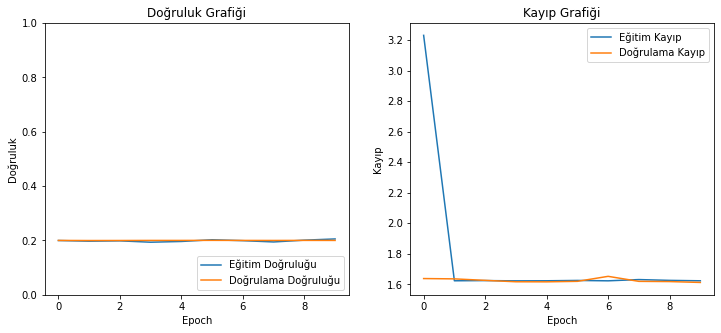

In [15]:
import matplotlib.pyplot as plt

# Eğitim sürecinin grafiklerini çizme
plt.figure(figsize=(12, 5))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Doğruluk Grafiği')

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend(loc='upper right')
plt.title('Kayıp Grafiği')

plt.show()